### Loading Data

In [24]:
file = open('Royal_data.txt', 'r')
royal_data = file.readlines()
print(royal_data)
file.close()

file = open(r'C:\Users\brend\PycharmProjects\Nlp_Exploration\scratch\statnett-green-bond-framework-2024.txt','r')
royal_data = file.readlines()
print(royal_data[0:5])
file.close()


['The future king is the prince\n', 'Daughter is the princess\n', 'Son is the prince\n', 'Only a man can be a king\n', 'Only a woman can be a queen\n', 'The princess will be a queen\n', 'The prince is a strong man\n', 'The princess is a beautiful woman\n', 'Prince is only a boy now\n', 'Prince will be king\n', 'A boy will be a man']
['<!-- image -->\n', '\n', '## Green Bond Framework\n', '\n', '<!-- image -->\n']


### Removing '\n' from the end of every sentence and convert the sentence into lowercase   


In [27]:
import re
import pandas as pd

print(len(royal_data))
#print(bool(re.search("image",royal_data[0])))

for i in range(len(royal_data)):
    royal_data[i] = royal_data[i].lower().replace('\n', '')

    #remove tables #remove images
    if bool(re.search("[|]",royal_data[i])) or bool(re.search("-- image",royal_data[i])):
        royal_data[i] = ''

    # Photo credits
    if bool(re.search("Photo:",royal_data[i])):
        royal_data[i] = ''


    # If want to remove Headers, I think yes?
    if bool(re.search("[#]",royal_data[i])):
        royal_data[i] = ''

    # Read amp errors
    royal_data[i] = re.sub('&amp;', '', royal_data[i])

    #Numbers not relevant
    for nums in range(5):
        royal_data[i] = re.sub(r'\d+\.*\d*', '', royal_data[i])

    #Single word lines
    if bool(re.search(r'^\w+$',royal_data[i])):
        royal_data[i] = ''

    #finally remove non word characters
    # X would remove spaces, specific cleaning later
    #royal_data[i] = royal_data[i].replace(r"\W", '')

    #couple occasions of photos references
    if bool(re.search(r'^photo',royal_data[i])):
        royal_data[i] = ''


    # dash openings
    royal_data[i] = re.sub('^-', '', royal_data[i])

    # Print sus, doesnt work. These should exist based on chart?
    #if bool(re.search('image',royal_data[i])):
    #    print(royal_data[i])

#print(type(royal_data))
royal_data = list(filter(None, royal_data))
#print(len(royal_data))

#debug csv
stringdebugcheck = pd.DataFrame(royal_data)
stringdebugcheck.to_csv('stringdebugcheck.csv', index=False)

#print(royal_data[1:5])


157


### Removing stop words


In [28]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

stopwords = stopwords.words('english')

#print(stopwords)

#for token input should be stopwords = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\brend\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [29]:
# Optional, I could split tokens into sentences for BOW model below. By default will bigram all words in token, token may be sentence or paragraph.. this is ok if encoding the whole chunk without defining boundaries within a paragraph

for i in range(len(royal_data)):
    royal_data[i] = royal_data[i].replace(r".", '')
    royal_data[i] = royal_data[i].replace(r"(", '')
    royal_data[i] = royal_data[i].replace(r")", '')
    royal_data[i] = royal_data[i].replace(r"%", '')
    royal_data[i] = royal_data[i].replace(r":", '')
    royal_data[i] = royal_data[i].replace(r";", '')
    royal_data[i] = royal_data[i].replace(r",", '')



In [30]:

#stopwords = ['the', 'is', 'will', 'be', 'a', 'only', 'can', 'their', 'now', 'and', 'at', 'it']
#replaces non words r"\W" #doesnt replace "-"

filtered_data = []
for sent in royal_data:
    temp = []

    for word in sent.split():
        if word not in stopwords:
            if word != '-' and word != '/':
                temp.append(word)
    filtered_data.append(temp)

print(filtered_data)

[['green', 'bond', 'framework'], ['green', 'change', 'pace', 'happening', 'across', 'countries', 'sectors'], ['robust', 'integrated', 'flexible', 'grid', 'prerequisite', 'reaching', 'climate', 'targets', 'enabling', 'new', 'green', 'industries', "statnett's", 'renewed', 'strategy', 'launched', 'sets', 'ambitious', 'targets', 'norwegian', 'grid', 'line', 'green', 'change', 'pace', 'statnett', 'launched', 'investment', 'plan', 'coming', 'decade', 'historic', 'ambitions'], ['sustainability', 'integral', 'part', 'plans', 'processes', 'order', 'realize', 'ambitions', 'grid', 'needs', 'built', 'minimal', 'impact', 'environment', 'acceptance', 'society', 'stakeholders', 'efficiently', 'possible', 'time', 'need', 'ensure', 'optimize', 'utilization', 'existing', 'planned', 'grid', 'develop', 'relevant', 'technology', 'ensure', 'sustainability', 'efficiency'], ['work', 'continuously', 'strengthen', 'efforts', 'prepare', 'grid', 'power', 'system', 'zero', 'emissions', 'future', "statnett's", 'mis

### Creating bigrams


In [31]:
bigrams = []
for words_list in filtered_data:
    for i in range(len(words_list) - 1):
        for j in range(i+1, len(words_list)): #range(.... len(words_list)) = bag of words model, full sentence length
            bigrams.append([words_list[i], words_list[j]])
            bigrams.append([words_list[j], words_list[i]])
            

bigramsdebugcheck = pd.DataFrame(bigrams)
bigramsdebugcheck.to_csv('bigrams_check.csv', index=False)

print(bigrams[0:20])

[['green', 'bond'], ['bond', 'green'], ['green', 'framework'], ['framework', 'green'], ['bond', 'framework'], ['framework', 'bond'], ['green', 'change'], ['change', 'green'], ['green', 'pace'], ['pace', 'green'], ['green', 'happening'], ['happening', 'green'], ['green', 'across'], ['across', 'green'], ['green', 'countries'], ['countries', 'green'], ['green', 'sectors'], ['sectors', 'green'], ['change', 'pace'], ['pace', 'change']]


### Getting a list of unique words

In [32]:
all_words = []
for bi in bigrams:
    all_words.extend(bi)

all_words = list(set(all_words))
all_words.sort()

print(all_words[0:10])
print("Total number of unique words are:", len(all_words))

["'appendix'", "'climate", "'committee'", "'do", "'eligible", "'fixed", "'minimum", "'no", "'substantial", "'the"]
Total number of unique words are: 1183


### Creating dictionary of words

In [33]:
words_dict = {}

counter = 0
for word in all_words:
    words_dict[word] = counter
    counter += 1

print(words_dict)

{"'appendix'": 0, "'climate": 1, "'committee'": 2, "'do": 3, "'eligible": 4, "'fixed": 5, "'minimum": 6, "'no": 7, "'substantial": 8, "'the": 9, "'transmission": 10, '-through': 11, 'ability': 12, 'academia': 13, 'acceptance': 14, 'accepted': 15, 'accidents': 16, 'accommodate': 17, 'accordance': 18, 'according': 19, 'accordingly': 20, 'account': 21, 'accounts': 22, 'accuracy': 23, 'accurate': 24, 'achieve': 25, 'achieved': 26, 'achieves': 27, 'achieving': 28, 'acquisition': 29, 'across': 30, 'act': 31, 'action': 32, 'actions': 33, 'activities': 34, 'activity': 35, 'acts': 36, 'actual': 37, 'adapted': 38, 'added': 39, 'addition': 40, 'additional': 41, 'address': 42, 'addressing': 43, 'adhere': 44, 'adopt': 45, 'adopting': 46, 'adverse': 47, 'affect': 48, 'affected': 49, 'affiliates': 50, 'affordable': 51, 'aggregate': 52, 'agreement': 53, 'aim': 54, 'aims': 55, 'align': 56, 'aligned': 57, 'alignment': 58, 'allocation': 59, 'allocations': 60, 'allows': 61, 'almost': 62, 'along': 63, 'alr

### Performing one-hot encoding

In [116]:
import numpy as np

onehot_data = np.zeros((len(all_words), len(all_words)))

for i in range(len(all_words)):
    onehot_data[i][i] = 1

onehot_dict = {}
counter = 0
for word in all_words:
    onehot_dict[word] = onehot_data[counter]
    counter += 1

for word in onehot_dict:
    print(word, ":", onehot_dict[word])


'appendix' : [1. 0. 0. ... 0. 0. 0.]
'climate : [0. 1. 0. ... 0. 0. 0.]
'committee' : [0. 0. 1. ... 0. 0. 0.]
'do : [0. 0. 0. ... 0. 0. 0.]
'eligible : [0. 0. 0. ... 0. 0. 0.]
'fixed : [0. 0. 0. ... 0. 0. 0.]
'minimum : [0. 0. 0. ... 0. 0. 0.]
'no : [0. 0. 0. ... 0. 0. 0.]
'substantial : [0. 0. 0. ... 0. 0. 0.]
'the : [0. 0. 0. ... 0. 0. 0.]
'transmission : [0. 0. 0. ... 0. 0. 0.]
-through : [0. 0. 0. ... 0. 0. 0.]
ability : [0. 0. 0. ... 0. 0. 0.]
academia : [0. 0. 0. ... 0. 0. 0.]
acceptance : [0. 0. 0. ... 0. 0. 0.]
accepted : [0. 0. 0. ... 0. 0. 0.]
accidents : [0. 0. 0. ... 0. 0. 0.]
accommodate : [0. 0. 0. ... 0. 0. 0.]
accordance : [0. 0. 0. ... 0. 0. 0.]
according : [0. 0. 0. ... 0. 0. 0.]
accordingly : [0. 0. 0. ... 0. 0. 0.]
account : [0. 0. 0. ... 0. 0. 0.]
accounts : [0. 0. 0. ... 0. 0. 0.]
accuracy : [0. 0. 0. ... 0. 0. 0.]
accurate : [0. 0. 0. ... 0. 0. 0.]
achieve : [0. 0. 0. ... 0. 0. 0.]
achieved : [0. 0. 0. ... 0. 0. 0.]
achieves : [0. 0. 0. ... 0. 0. 0.]
achieving : 

In [117]:
X = []
Y = []

for bi in bigrams:
    X.append(onehot_dict[bi[0]])
    Y.append(onehot_dict[bi[1]])
    
X = np.array(X)
Y = np.array(Y)

print(X[0:][0]) #future
print(Y[0:][0]) #king

print(X[0:][1]) #king
print(Y[0:][1]) #future


[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]


### Model

In [120]:
from keras.models import Sequential
from keras.layers import Dense

embed_size = 2

model = Sequential([
    Dense(embed_size, activation='linear'),
    Dense(Y.shape[1], activation = 'softmax')
])

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam')



In [121]:
#model.fit(X, Y, epochs = 1000, batch_size = 256, verbose = False)
model.fit(X, Y, epochs = 1000, batch_size = 256, verbose = False)


In [126]:
weights = model.get_weights()[0]
print(weights)

model.get_weights()
word_embeddings = {}
for word in all_words:
    word_embeddings[word] = weights[words_dict[word]]

# print(word_embeddings)

[[ 1.6874477  -1.7321738 ]
 [ 1.1820222  -1.1852524 ]
 [ 0.04913063 -3.0567017 ]
 ...
 [ 0.45120814  2.1077359 ]
 [ 1.9333689   1.5813017 ]
 [ 1.3928891  -1.2097143 ]]


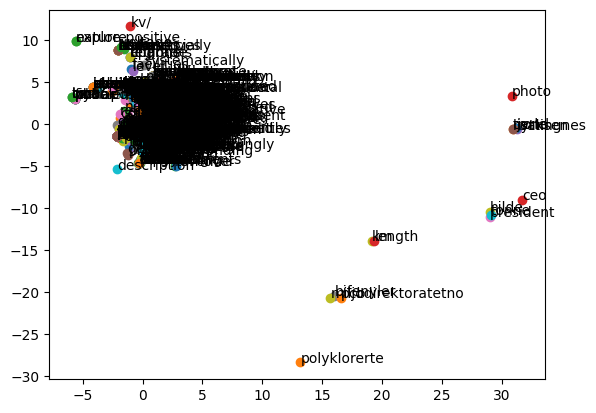

In [127]:
import matplotlib.pyplot as plt

# plt.figure(figsize = (10, 10))
for word in list(words_dict.keys()):
    coord = word_embeddings.get(word)
    plt.scatter(coord[0], coord[1])
    plt.annotate(word, (coord[0], coord[1]))

plt.savefig('img.jpg')